## Logistic Regression

LogisticRegression for binary classification :
    
    LogisticRegression predicts probabilities.
        if the probability 'p' is greater than 0.5:
            The data is labeled as '1'
        if the probability 'p' is less than 0.5:
            The data is labeled as '0'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
data = pd.read_csv("Diabetese.csv")

In [8]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [10]:
X = data.drop('diabetes', axis=1)
y= data['diabetes']

In [11]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



## Plotting ROC Curve

This plot shows the changes in the True positive Rate with respect to
changes in the False Positive Rate..

Text(0,0.5,'True Positive Rate')

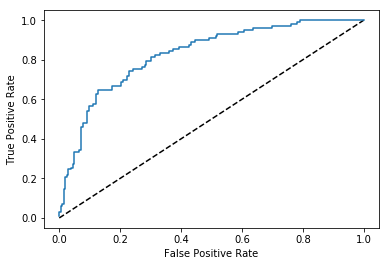

In [21]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

# plotting roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Area under the ROC

Larger the area under the curve = better model

In [23]:
from sklearn.metrics import roc_auc_score

print("auc score : {}".format(roc_auc_score(y_test, y_pred_prob)))

auc score : 0.8268608414239483


## AUC with Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print('auc cross val score : {}'.format(np.mean(cross_val)))

auc cross val score : 0.8285066387141858
